In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numba

from typing import Dict

from saturation.simulation import *
from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

In [271]:
def aggregate_simulations(stats: pd.DataFrame, expected_count: int):
    columns_to_aggregate = [
        'n_craters_in_observation_area',
        'areal_density',
        'z',
        'za'
    ]
    aggregations = {
        x: [
            'min',
            pd.NamedAgg(column=x, aggfunc=percentile(25)),
            'mean',
            pd.NamedAgg(column=x, aggfunc=percentile(75)),
            'max'
        ]
        for x in columns_to_aggregate
    }
    col_names = [
        [
            f'{x}_min',
            f'{x}_25_percentile',
            f'{x}_mean',
            f'{x}_75_percentile',
            f'{x}_max'
        ]
        for x in columns_to_aggregate
    ]
    col_names = [y for x in col_names for y in x]

    grouped = stats.groupby(['n_craters_generated']).agg(
        aggregations
    )

    grouped.columns = col_names
    grouped['group_count'] = stats.groupby(['n_craters_generated']).n_craters_in_observation_area.agg('count')
    
    # Make sure all samples have full data
    grouped = grouped[grouped.group_count == expected_count]
    
    
    grouped.reset_index(inplace=True)
    
    return grouped


def plot_statistics(stats: pd.DataFrame):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Plot crater count
    ax = axes[0][0]
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_min)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_25_percentile)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_mean)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_75_percentile)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_max)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Observable Craters')

    # Plot crater count
    ax = axes[0][1]
    ax.plot(stats.n_craters_generated, stats.areal_density_min)
    ax.plot(stats.n_craters_generated, stats.areal_density_25_percentile)
    ax.plot(stats.n_craters_generated, stats.areal_density_mean)
    ax.plot(stats.n_craters_generated, stats.areal_density_75_percentile)
    ax.plot(stats.n_craters_generated, stats.areal_density_max)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Areal Density')

    # Plot Z statistic
    ax = axes[1][0]
    ax.plot(stats.n_craters_generated, stats.z_min)
    ax.plot(stats.n_craters_generated, stats.z_25_percentile)
    ax.plot(stats.n_craters_generated, stats.z_mean)
    ax.plot(stats.n_craters_generated, stats.z_75_percentile)
    ax.plot(stats.n_craters_generated, stats.z_max)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Z Statistic')

    # Plot Za statistic
    ax = axes[1][1]
    ax.plot(stats.n_craters_generated, stats.za_min)
    ax.plot(stats.n_craters_generated, stats.za_25_percentile)
    ax.plot(stats.n_craters_generated, stats.za_mean)
    ax.plot(stats.n_craters_generated, stats.za_75_percentile)
    ax.plot(stats.n_craters_generated, stats.za_max)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Za Statistic')

    plt.show()


In [272]:
def percentile(n):
    @numba.jit(forceobj=True, fastmath=True)
    def _percentile(x):
        return np.percentile(x, n)
    return _percentile

In [329]:
base_path = '/home/mason/output/'
filenames = [
    f'{base_path}/sim_run_1_3_0.4_1.5_{x}.csv'
    for x in range(1, 56)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename)
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

python_stats = aggregate_simulations(stats, len(sim_stats))
python_stats.tail()

,n_craters_generated,n_craters_in_observation_area_min,n_craters_in_observation_area_25_percentile,n_craters_in_observation_area_mean,n_craters_in_observation_area_75_percentile,n_craters_in_observation_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max,group_count
4993,4996,456,617.5,807.436364,963.5,1298,0.168859,0.265504,0.298170,0.333007,...,-5.907871,-4.905554,-3.455937,-1.159536,-7.757707,2.749972,4.803169,7.592972,15.025580,55
4994,4997,457,618.5,808.345455,964.5,1299,0.168859,0.265508,0.298222,0.333016,...,-5.843924,-4.891641,-3.446871,-1.108772,-7.840115,2.728811,4.829309,7.656632,14.984046,55
4995,4998,458,619.5,809.163636,965.0,1300,0.168861,0.265784,0.298237,0.333018,...,-5.896306,-4.874645,-3.496083,-1.096489,-7.881296,2.762094,4.856057,7.673526,15.073124,55
4996,4999,459,620.5,810.090909,966.0,1301,0.168909,0.265786,0.298277,0.333024,...,-5.862868,-4.853158,-3.566385,-1.089826,-7.865182,2.774885,4.889669,7.721363,15.133267,55
4997,5000,460,621.5,810.890909,967.0,1302,0.168924,0.265970,0.298405,0.333066,...,-5.877285,-4.832499,-3.540940,-1.051242,-7.585394,2.820918,4.924073,7.836865,15.253325,55


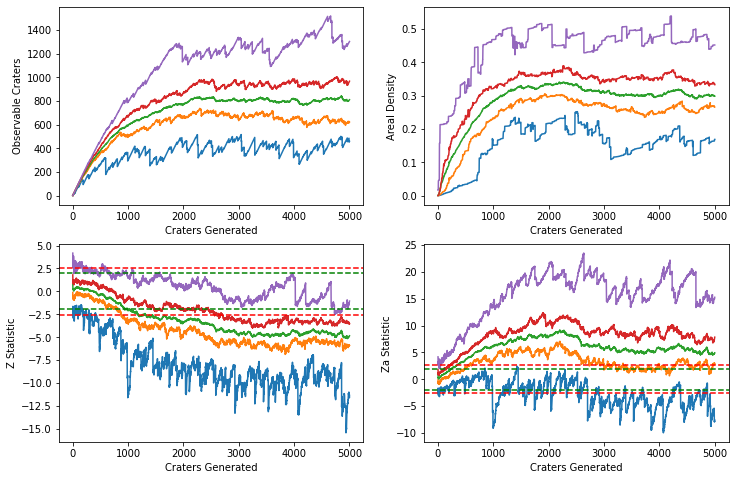

In [330]:
plot_statistics(python_stats)

In [275]:
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in range(1, 55)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_generated', 'n_craters_in_observation_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

idl_stats = aggregate_simulations(stats, len(sim_stats))
idl_stats.tail()

,n_craters_generated,n_craters_in_observation_area_min,n_craters_in_observation_area_25_percentile,n_craters_in_observation_area_mean,n_craters_in_observation_area_75_percentile,n_craters_in_observation_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max,group_count
4978,4995,445,698.0,824.925926,962.00,1263,0.158548,0.254422,0.294989,0.347122,...,-5.6025,-4.344630,-3.0725,-0.62,-6.16,3.0325,5.585185,8.9375,15.53,54
4979,4996,446,699.0,825.314815,963.00,1264,0.158551,0.254426,0.295120,0.347275,...,-5.6275,-4.337037,-3.0825,-0.61,-6.14,3.0775,5.604259,8.9800,15.68,54
4980,4997,447,695.0,824.870370,963.75,1265,0.158610,0.254481,0.295833,0.347276,...,-5.6700,-4.366481,-3.1275,-0.57,-6.03,3.0325,5.591296,8.9275,15.88,54
4981,4998,407,696.0,822.092593,964.75,1266,0.173722,0.254492,0.295775,0.347277,...,-5.7000,-4.455370,-3.1025,-0.53,-5.77,2.9125,5.464444,8.9950,15.80,54
4982,4999,408,697.0,822.888889,965.75,1267,0.173722,0.254567,0.295910,0.347278,...,-5.7650,-4.457963,-3.1375,-0.51,-5.70,2.8625,5.472222,9.0725,15.78,54


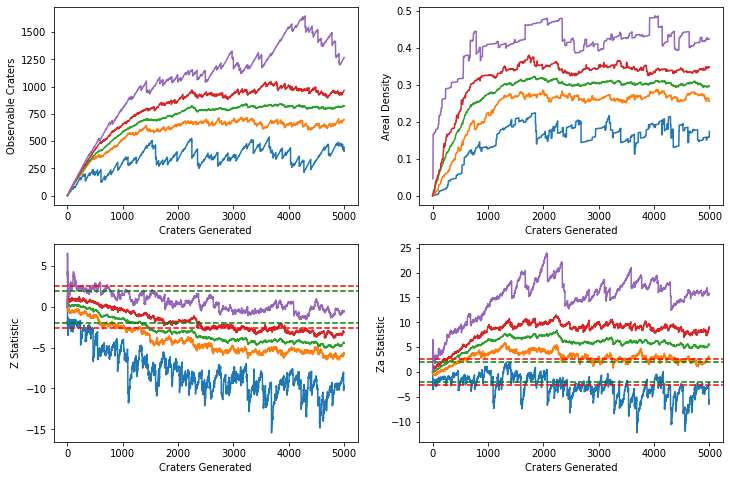

In [276]:
plot_statistics(idl_stats)

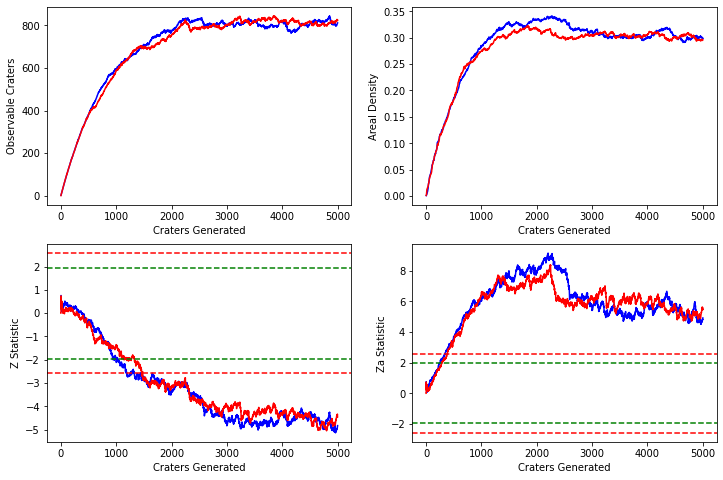

In [333]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot crater count
ax = axes[0][0]
ax.plot(python_stats.n_craters_generated, python_stats.n_craters_in_observation_area_mean, color='b')
ax.plot(idl_stats.n_craters_generated, idl_stats.n_craters_in_observation_area_mean, color='r')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Observable Craters')

# Plot crater count
ax = axes[0][1]
ax.plot(python_stats.n_craters_generated, python_stats.areal_density_mean, color='b')
ax.plot(idl_stats.n_craters_generated, idl_stats.areal_density_mean, color='r')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Areal Density')

# Plot Z statistic
ax = axes[1][0]
ax.plot(python_stats.n_craters_generated, python_stats.z_mean, color='b')
ax.plot(idl_stats.n_craters_generated, idl_stats.z_mean, color='r')
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Z Statistic')

# Plot Za statistic
ax = axes[1][1]
ax.plot(python_stats.n_craters_generated, python_stats.za_mean, color='b')
ax.plot(idl_stats.n_craters_generated, idl_stats.za_mean, color='r')
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Za Statistic')

plt.show()

### Comparing Curves

In [283]:
import scipy.stats

def compare_curves(first: pd.DataFrame,
                   second: pd.DataFrame,
                   columns: List[str]):
    first_diff = first[columns]
    # first_diff = (first_diff - first_diff.shift(1)).dropna()

    second_diff = second[columns]
    # second_diff = (second_diff - second_diff.shift(1)).dropna()
    
    print('Two-sample Anderson-Darling tests:')
    for column in columns:
        result = scipy.stats.anderson_ksamp([first_diff[column], second_diff[column]])
        print(f'{column}: {result.significance_level:0.3f}')
    
    print('\nTwo-sample Kolmogorov-Smirnoff tests:')
    for column in columns:
        result = scipy.stats.kstest(first_diff[column], second_diff[column])
        print(f'{column}: {result.pvalue:0.3f}')

In [334]:
first_choices = np.random.choice(range(1, 55), 27, replace=False)
second_choices = [x for x in range(1, 55) if x not in first_choices]

In [335]:
# First compare half the IDL data to the other half as a reference
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in first_choices
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_generated', 'n_craters_in_observation_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

idl_stats1 = aggregate_simulations(stats, len(sim_stats))
idl_stats1.tail()

,n_craters_generated,n_craters_in_observation_area_min,n_craters_in_observation_area_25_percentile,n_craters_in_observation_area_mean,n_craters_in_observation_area_75_percentile,n_craters_in_observation_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max,group_count
4986,4995,445,646.0,771.111111,863.5,1169,0.209109,0.256006,0.294572,0.332652,...,-5.375,-3.851111,-2.565,-1.02,-1.10,3.220,5.619259,8.38,12.42,27
4987,4996,446,647.0,772.074074,864.5,1170,0.209199,0.256007,0.294608,0.332652,...,-5.330,-3.838148,-2.450,-1.06,-0.83,3.235,5.642593,8.53,12.39,27
4988,4997,447,648.0,771.000000,865.5,1171,0.209201,0.256012,0.295306,0.340811,...,-5.340,-3.865556,-2.800,-1.09,-0.82,3.280,5.629630,8.13,12.43,27
4989,4998,407,649.0,765.037037,866.0,1172,0.209206,0.256024,0.294577,0.340994,...,-5.475,-4.064444,-2.805,-1.07,-3.91,2.945,5.327037,8.12,12.42,27
4990,4999,408,649.5,765.814815,866.5,1173,0.209212,0.256026,0.294800,0.341002,...,-5.495,-4.070370,-2.710,-1.08,-3.82,2.885,5.335556,8.09,12.44,27


In [336]:
# First compare half the IDL data to the other half as a reference
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in second_choices
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_generated', 'n_craters_in_observation_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

idl_stats2 = aggregate_simulations(stats, len(sim_stats))
idl_stats2.tail()

,n_craters_generated,n_craters_in_observation_area_min,n_craters_in_observation_area_25_percentile,n_craters_in_observation_area_mean,n_craters_in_observation_area_75_percentile,n_craters_in_observation_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max,group_count
4986,4995,493,728.5,878.740741,1056.0,1263,0.158548,0.254763,0.295407,0.352122,...,-6.095,-4.838148,-3.795,-0.62,-6.16,2.440,5.551111,9.040,15.53,27
4987,4996,494,729.5,878.555556,1057.0,1264,0.158551,0.254771,0.295632,0.352176,...,-6.120,-4.835926,-3.825,-0.61,-6.14,2.475,5.565926,9.070,15.68,27
4988,4997,479,730.5,878.740741,1058.0,1265,0.158610,0.254881,0.296360,0.352185,...,-6.125,-4.867407,-3.820,-0.57,-6.03,2.510,5.552963,9.000,15.88,27
4989,4998,480,731.5,879.148148,1059.0,1266,0.173722,0.254889,0.296972,0.352192,...,-6.050,-4.846296,-3.810,-0.53,-5.77,2.365,5.601852,9.025,15.80,27
4990,4999,481,732.5,879.962963,1060.0,1267,0.173722,0.254999,0.297021,0.352217,...,-6.030,-4.845556,-3.780,-0.51,-5.70,2.410,5.608889,9.110,15.78,27


In [337]:
columns = ['n_craters_in_observation_area_mean', 'areal_density_mean', 'z_mean', 'za_mean']
compare_stats(idl_stats1, idl_stats2, columns)

Two-sample Anderson-Darling tests:
n_craters_in_observation_area_mean: 0.250
areal_density_mean: 0.085
z_mean: 0.103
za_mean: 0.175

Two-sample Kolmogorov-Smirnoff tests:
n_craters_in_observation_area_mean: 0.693
areal_density_mean: 0.030
z_mean: 0.141
za_mean: 0.141


/tmp/ipykernel_838187/501488739.py:14: UserWarning: p-value capped: true value larger than 0.25
  result = scipy.stats.anderson_ksamp([first_diff[column], second_diff[column]])


In [338]:
compare_stats(python_stats, idl_stats, columns)

Two-sample Anderson-Darling tests:
n_craters_in_observation_area_mean: 0.072
areal_density_mean: 0.250
z_mean: 0.242
za_mean: 0.236

Two-sample Kolmogorov-Smirnoff tests:
n_craters_in_observation_area_mean: 0.015
areal_density_mean: 0.507
z_mean: 0.336
za_mean: 0.091


/tmp/ipykernel_838187/501488739.py:14: UserWarning: p-value capped: true value larger than 0.25
  result = scipy.stats.anderson_ksamp([first_diff[column], second_diff[column]])
